In [2]:
import tensorflow as tf
from tensorflow.python.framework import ops
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
def create_placeholder(n_h,n_w,n_y):
  X=tf.placeholder(tf.float32,shape=(None,n_h,n_w,1),name='X')
  Y=tf.placeholder(tf.float32,shape=(None,n_y),name='Y')
  return X,Y
 

In [0]:

os.chdir('drive/My Drive')


In [9]:
import os
cwd=os.getcwd()
print(cwd)

/content/drive/My Drive


In [10]:
!ls

 clouderizer  'Colab Notebooks'


In [0]:
def initialize_parameters():
  W1=tf.get_variable("W1",[4,4,1,16],initializer=tf.contrib.layers.xavier_initializer())
  W2=tf.get_variable("W2",[2,2,16,32],initializer=tf.contrib.layers.xavier_initializer())
  parameters={"W1":W1,
               "W2":W2}
  return parameters

In [0]:
def forward_propagate(X,parameters):
  
  W1=parameters['W1']
  W2=parameters['W2'] #retriving the parametrs  
  
  
  Z1=tf.nn.conv2d(X,W1,strides=[1,1,1,1],padding='SAME')  
  A1=tf.nn.relu(Z1)  
  
  P1=tf.nn.max_pool(A1,ksize=[1,4,4,1],strides=[1,4,4,1],padding='SAME')
  
  Z2=tf.nn.conv2d(P1,W2,strides=[1,2,2,1],padding='VALID')
  A2=tf.nn.relu(Z2)
  
  F= tf.contrib.layers.flatten(A2)
  Z3=tf.contrib.layers.fully_connected(F,10,activation_fn=None)
  
  return Z3

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train=x_train.reshape(-1,28,28,1)                                                    #Loading the dataset 
x_test=x_test.reshape(-1,28,28,1)

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
import numpy as np
def convert_to_one_hot(Y, C):
    Y = np.eye(C)[Y.reshape(-1)].T
    return Y
y_train=convert_to_one_hot(y_train,10)
y_test=convert_to_one_hot(y_test,10)

In [0]:
y_train=y_train.T
y_test=y_test.T

In [16]:
print(x_train.shape)
print(y_test.shape)
#X_train=x_train.reshape(-1,28,28,1)
#X_test=x_test.reshape(-1,28,28,1)

(60000, 28, 28, 1)
(10000, 10)


In [0]:
def compute_cost(Z3,Y):
  cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Z3,labels=Y))
  return cost

In [0]:
def model(x_train,y_train,x_test,y_test):
  
  ops.reset_default_graph()
  (m,n_h,n_w,n_c)=x_train.shape
  n_y=10 
  costs=[]
  X,Y=create_placeholder(n_h,n_w,n_y)
  parameters=initialize_parameters()
  Z3=forward_propagate(X,parameters)
  cost=compute_cost(Z3,Y)
    
  optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)
  init=tf.global_variables_initializer()
  
  saver = tf.train.Saver()
  
  with tf.Session() as sess:
    sess.run(init)
    saver.restore(sess, "Colab Notebooks/MNIST/MNIST.ckpt")

    #saver.restore(sess,
    for epoch in range(500):
      _,temp_cost=sess.run([optimizer,cost],feed_dict={X:x_train,Y:y_train})
    
      if epoch%20==0:
        print ("Cost after epoch %i: %f" % (epoch, temp_cost))
      if epoch % 1 == 0:
                costs.append(temp_cost)
        
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
        #plt.title("Learning rate =" + str(learning_rate))
    plt.show()

        # Calculate the correct predictions
    predict_op = tf.argmax(Z3, 1)
    correct_prediction = tf.equal(predict_op, tf.argmax(Y, 1))
        
        # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    print(accuracy)
    train_accuracy = accuracy.eval({X: x_train, Y: y_train})
    test_accuracy = accuracy.eval({X: x_test, Y: y_test})
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    saver.save(sess, "Colab Notebooks/MNIST.ckpt")
                
  return train_accuracy, test_accuracy, parameters     

INFO:tensorflow:Restoring parameters from Colab Notebooks/MNIST/MNIST.ckpt
Cost after epoch 0: 0.042171
Cost after epoch 20: 0.042092
Cost after epoch 40: 0.042017
Cost after epoch 60: 0.041942
Cost after epoch 80: 0.041865
Cost after epoch 100: 0.041789
Cost after epoch 120: 0.041714
Cost after epoch 140: 0.041638
Cost after epoch 160: 0.041561
Cost after epoch 180: 0.041481
Cost after epoch 200: 0.041401
Cost after epoch 220: 0.041322
Cost after epoch 240: 0.041244
Cost after epoch 260: 0.041165
Cost after epoch 280: 0.041084
Cost after epoch 300: 0.041003
Cost after epoch 320: 0.040924
Cost after epoch 340: 0.040844
Cost after epoch 360: 0.040765
Cost after epoch 380: 0.040686
Cost after epoch 400: 0.040606
Cost after epoch 420: 0.040527
Cost after epoch 440: 0.040448
Cost after epoch 460: 0.040370
Cost after epoch 480: 0.040294


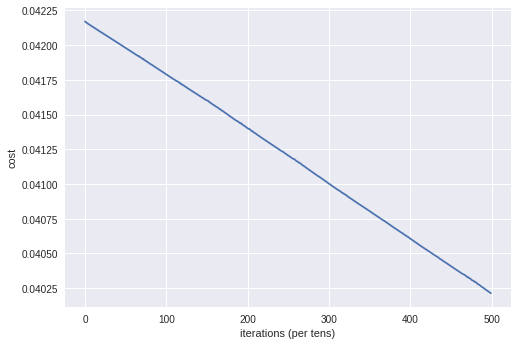

Tensor("Mean_1:0", shape=(), dtype=float32)
Train Accuracy: 0.9874
Test Accuracy: 0.9773


In [43]:
_, _, parameters = model(x_train, y_train, x_test, y_test)  #with channel number 16,32